# Финальный проект: E-commerce — Выявление профилей потребления

**Задачей проекта** является анализ транзакций интернет-магазина товаров для дома и быта "Пока все ещё тут" и выявление профилей потребления путем сегментации покупателей интернет-магазина. 

**Заказчиком проекта** является менеджер интернет-магазина, который работает с покупателями.

**Целью исследования** является предоставление менеджеру методики по сегментации покупателей и рекомендаций по каждому сегменту для формирования персонализированных предложений с целью увеличения выручки интернет-магазина.

**Описание данных:**

Датасет `ecom_dataset_upd.csv` описывает транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут».

Колонки в `ecom_dataset_upd.csv`:
- `date` — дата заказа;
- `customer_id` — идентификатор покупателя;
- `order_id` — идентификатор заказа;
- `product` — наименование товара;
- `quantity` — количество товара в заказе;
- `price` — цена товара.

**Декомпозиция задачи**:

**Шаг 1.** Изучение общей информации.
- Проверка корректности выгрузки данных.

**Шаг 2.** Предобработка данных. 
- Исследование пропущенных значений;
- Исследование типов данных и их приведение к корректному типу;
- Добавление новых столбцов;
- Исследование и обработка дубликатов;
- Исследование аномалий в данных и их удаление при необходимости.

**Шаг 3.** Проведение исследовательского анализа. Анализ ключевых метрик.
- Проверка временного периода, за который мы имеем данные;
- Общее исследование данных (общее количество покупок в датасете, общее количество покупателей);
- Анализ среднего чека покупателей;
- Анализ среднего количества заказов на одного покупателя;
- Анализ изменения общей выручки интернет-магазина по месяцам за весь исследуемый период;
- Анализ количества заказов в Интернет-магазине за весь исследуемый период;
- Оценка пользовательской активности;
- Категоризация товаров по группам;
- ABC-анализ сформированных категорий товаров для выявления приоритетных позиций.

**Шаг 4.** Сегментация покупателей.

**Шаг 5.** Проверка статистических гипотез.

- Сумма среднего чека в сегментах покупателей "в зоне риска" и "потенциальные" одинаковая. 

- Среднее дневное количество заказов в январе 2020 года не изменилось относительного того же периода 2019 года.

**Шаг 6.** Подготовка рекомендаций для будущей сегментации покупателей.

**Шаг 7.** На основании проведенного анализа и проверенных гипотез подготовка презентации. 

**Шаг 8.** Оформление дашборда по очищенным данным. 

## Шаг 1. Изучение общей информации

#### 1. Импортируем библиотеки, которые понадобятся нам в ходе работы над проектом. Считываем данные из csv-файла в датафрейм и сохраняем в переменную `df`. Путь к файлу: /datasets/ecom_dataset_upd.csv.

In [1]:
#библиотеки для изучения и преобразования данных
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime

#библиотеки для построения графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle

#библиотеки для проверки статистических гипотез
from scipy import stats as st
from scipy.stats import norm

#устанавливаем контекстный лемматизатор
!!pip install pymystem3 
!!pip install nltk
!!pip install collections
from pymystem3 import Mystem
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

#настраиваем видимость символов
pd.set_option('max_colwidth', 200)

In [2]:
#сохраняем датасет в переменной df
try: 
    df = pd.read_csv('ecom_dataset_upd.csv') 
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/ecom_dataset_upd.csv')

#### 2. Выводим первые 50 строчек датафрема `df` на экран.

In [3]:
df.head(50)

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
5,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0
6,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0
7,2018100108,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0
8,2018100108,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С614, 1404056",1,269.0
9,2018100109,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beige 130х50 см из хлопка 5379,1,674.0


#### 3. Выведем основную информацию о датафрейме с помощью метода `info()`.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


#### 4. Посмотрим на данные с помощью метода `describe()`.

In [5]:
df.describe()

,date,order_id,quantity,price
count,7.474000e+03,7474.000000,7474.000000,7474.000000
mean,2.018913e+09,49449.884265,2.362858,478.737501
std,4.278878e+05,32679.642404,14.500497,901.615895
min,2.018100e+09,12624.000000,1.000000,9.000000
25%,2.019022e+09,14833.000000,1.000000,97.000000
50%,2.019051e+09,68768.000000,1.000000,135.000000
75%,2.019063e+09,71257.750000,1.000000,439.000000
max,2.020013e+09,112789.000000,1000.000000,14917.000000


**Промежуточный вывод по результатам первичного изучения информации:**
1. В датафрейме 6 столбцов и 7474 строк. 
2. В столбце `date` некорректный тип данных, - требуется преобразовать его на этапе предобработки. 
3. В датафрейме данные не аггрегированы, т.е. одна строка соответствует одной позиции в заказе покупателя, а позиций может быть несколько. 
4. Мы не имеем данных о категории, к которой относится товар, соответственно, необходимо проведение категоризации товаров. 
5. Есть аномальные значения, а именно 1000 шт. какого-то товара в одном заказе, вероятно, это оптовый покупатель, данные о заказе которого попали в нашу выборку, либо это какой-то тестовый заказ. Также видим, что в столбце `price` есть товар, стоимость которого 14917 у.е., при том, что средняя цена товара в магазине составляет 478,73 у.е. Более подробно изучим такие значения в рамках предобработки. 

## Шаг 2. Предобработка данных

#### 5. Проверка наличия пропусков.

In [6]:
df.isna().sum()

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

Пропуски в датафрейме отсутствуют.

#### 6. Преобразуем тип данных и добавим новые столбцы, связанные с датой и временем

In [7]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d%H')

In [8]:
#выделяем отдельно месяц и день оформления заказа
df['y_m'] = pd.to_datetime(df['date']).dt.to_period("M")
#выделяем год-месяц-день оформления заказа без часов
df['y_m_d'] = pd.to_datetime(df['date']).dt.date
df['year'] = pd.to_datetime(df['date']).dt.year
df['month'] = pd.to_datetime(df['date']).dt.month
df['week'] = pd.to_datetime(df['date']).dt.isocalendar().week
df['day'] = pd.to_datetime(df['date']).dt.day
df['hour'] = df['date'].dt.hour

Мы привели тип данных в столбце `date` к формату год-месяц-день-час. В отдельный столбец `y_m` вынесли год и месяц оформления заказа, в столбец `y_m_d` год-месяц-день оформления заказа, а также дополнили нашу таблицу еще 5 столбцами: год, месяц, неделя, день, час оформления заказа.

#### 7. Проверка и удаление дубликатов

#### 7.1. Приводим наименования товаров в столбце `product` к нижнему регистру.

In [9]:
df['product'] = df['product'].str.lower()

#### 7.2. Проверяем полные дубликаты.

In [10]:
print('Количество полных дубликатов в датасете:', df.duplicated().sum())

Количество полных дубликатов в датасете: 0


#### 7.3. Проверяем скрытые дубликаты.

Проверку скрытых дубликатов осуществляем по столбцам с id покупателя, id заказа, названием товара и ценой.

In [11]:
df.duplicated(subset=['customer_id', 'order_id', 'product', 'quantity', 'price']).sum()

1864

Итого у нас 1864 скрытых дубликата, найденных по вышеуказанным параметрам. Удалим такие дубликаты, оставив первое вхождение, используя параметр `keep='first'`.

Также создадим переменную `df_clear` - это будет наш очищенный от дубликатов и аномалий датасет.

In [12]:
#удаляем скрытые дубликаты
df_clear = df.drop_duplicates(subset=['customer_id', 'order_id', 'product', 'quantity', 'price'], keep='first')

In [13]:
#проверяем работу функции drop_duplicates()
df_clear.shape

(5610, 13)

#### 7.4. Проверим, попадают ли разные покупатели в одни и те же заказы.

Заказ может оформить только один пользователь, соответственно заказы, у которых свыше 1 покупателя, мы удалим. 

In [14]:
#по очищенному датасету группируем заказы, считаем количество уникальных пользователей
double_users = df_clear.groupby('order_id').agg({'customer_id':'nunique'}).query('customer_id>1')
double_users.head()

,customer_id
order_id,
14872,2
68785,2
69283,2
69310,2
69345,2


In [15]:
df_clear = df_clear.query('order_id not in @double_users.index')

In [16]:
df_clear.shape

(5544, 13)

Вероятно, из-за системной ошибки в данных оказались уникальные идентификаторы заказов с разными id клиентов. От них мы избавились.

#### 7.5. Проверим, оформлялся ли один и тот же заказ в разные даты.

In [17]:
#по очищенному датасету группируем заказы и проверяем, есть ли заказы, оформленные в разные дни
duplicated_orders = df_clear.groupby('order_id', as_index=False).agg({'y_m_d':'nunique'}).query('y_m_d>1')

In [18]:
#с помощью to_list переносим все идентификаторы повторяющихся заказов
list_of_dup_ord = duplicated_orders['order_id'].to_list()
#делаем срез из нашего df_clear, сортируемся по order_id, чтобы повторы были рядом, выведем первые 30 строк
df_clear.query('order_id in @list_of_dup_ord').sort_values(by='order_id')

,date,customer_id,order_id,product,quantity,price,y_m,y_m_d,year,month,week,day,hour
482,2018-10-28 08:00:00,3ee43256-af7d-4036-90d4-eeefa1afc767,14500,"многолетнее растение душица-орегано розовый объем 0,5 л",1,89.0,2018-10,2018-10-28,2018,10,43,28,8
483,2018-10-28 08:00:00,3ee43256-af7d-4036-90d4-eeefa1afc767,14500,"многолетнее растение тимьян-чабрец розовый объем 0,5 л",1,89.0,2018-10,2018-10-28,2018,10,43,28,8
484,2018-10-28 08:00:00,3ee43256-af7d-4036-90d4-eeefa1afc767,14500,пеларгония зональная диам. 12 см белая полумахровая,1,188.0,2018-10,2018-10-28,2018,10,43,28,8
485,2018-10-28 08:00:00,3ee43256-af7d-4036-90d4-eeefa1afc767,14500,пеларгония зональная диам. 12 см розовая с малиновым полумахровая,1,188.0,2018-10,2018-10-28,2018,10,43,28,8
486,2018-10-28 08:00:00,3ee43256-af7d-4036-90d4-eeefa1afc767,14500,пеларгония зональная диам. 12 см сиреневый полумахровый,1,188.0,2018-10,2018-10-28,2018,10,43,28,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2856,2019-04-15 12:00:00,ae6940d3-a1c7-4997-8853-a5b8afc60d51,71148,гладильная доска ника гранд 122х42 см нг,1,1799.0,2019-04,2019-04-15,2019,4,16,15,12
3888,2019-05-17 14:00:00,2c2f1c82-d5f8-462a-b3ea-8ab375a8fa0d,71413,карниз для ванной комнаты виолет раздвижной 280 см с кольцами бежевый 2810/2,2,224.0,2019-05,2019-05-17,2019,5,20,17,14
3699,2019-05-13 18:00:00,2c2f1c82-d5f8-462a-b3ea-8ab375a8fa0d,71413,карниз для ванной комнаты виолет раздвижной 280 см с кольцами бежевый 2810/2,1,224.0,2019-05,2019-05-13,2019,5,20,13,18
3797,2019-05-15 00:00:00,d05e3c48-3745-408e-8880-d787e06062ae,71426,стремянка colombo factotum 3 ступени стальная g110l03w,1,1949.0,2019-05,2019-05-15,2019,5,20,15,0


В результате ручного перебора поступили следующим образом:
- Заказ № 14500 был оформлен 28.10 и 31.10. Заказ, оформленный 28.10., - очень большой, там много позиций, а вот 31 числа в 6 утра заказали рассаду. Заказ, оформленный 31.10, удалили.
- Заказ № 14649 был оформлен 16.04.2019 в 13:00 и 16:00. Фактически это тоже дубль. Строчку с заказом в 16:00 удаляем из датафрейма (аналогично сделала с заказами такого типа, где в один день заказ с одним номером, но в разные часы). 
- У нас есть заказ № 14833, который оформлялся 31.05.2019 и 03.06.2019. Покупатель в оба дня заказал большое количество товаров, - удалив такой заказ, потеряем много данных. Принято решение его оставить, т.к. вероятнее всего произошла ошибка в выгрузке данных или номер заказа был некорректно присвоен. 
- Заказ № 692828 оформлялся 10.12.2018 и 17.12.2018, оба раза покупатель заказывал кружки одного и того же артикула, но разное количество. Удалила обе строки.
- Заказ № 69527 также оформлялся в разные даты: 23.12.2018 и 24.12.2018, в заказе в разные даты были разные товары. Мы не знаем, какой заказ мы можем оставить, поэтому удаляем обе строки (аналогично сделала с остальными заказами такого типа).
- Заказ № 69750 был оформлен дважды: 09.01.2019 и 13.02.2019, в заказе оба раза была сумка-тележка. Оставляем только ранний заказ. 
- Также были замечены заказы с одним номером, оформленные в разные дни, где цена товара сначала была ниже, а затем стала выше, например, заказ № 70031 (муляж 30 января стоил 22 у.е., а 04.02 стал стоит 59 у.е.). Такие заказы полностью удалила. 

In [19]:
df_clear = df_clear.drop(index=[550, 2901, 5803, 1232, 1152, 1351, 1319, 1814, 1807, 1507, 1535, 1533, 1692, 1636, 1765, 1802,
                               1938, 1886, 2032, 2205, 2342, 2347, 2365, 2571, 2743, 2632, 2948, 2850, 4122, 2856, 3349, 3386, 
                               3699, 3888, 3797, 5832, 5836, 6258, 6263])

In [20]:
df_clear.shape

(5505, 13)

#### 8. Проверка аномалий

На этапе изучения данных мы выяснили, что в датафрейме вероятно есть аномальные значения, проверим их.

#### 8.1. Проверим с помощью boxplot выбросы в столбце с количеством товара в заказе

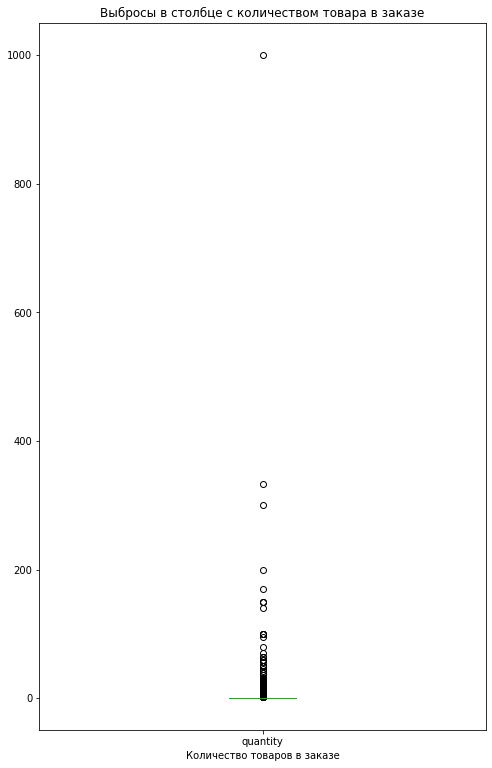

In [21]:
df_clear['quantity'].plot(kind='box', figsize=(8, 13))
plt.title('Выбросы в столбце с количеством товара в заказе')
plt.xlabel('Количество товаров в заказе')
plt.show()

В среднем значения в столбце `quantity` распределены равномерно, однако видим выброс на 1000, - посмотрим, что это был за заказ. 

In [22]:
print(df_clear[df_clear['quantity'] == 1000])

                    date                           customer_id  order_id  \
5456 2019-06-18 15:00:00  312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6     71743   

                                                                product  \
5456  вантуз с деревянной ручкой d14 см красный, burstenmann, 0522/0000   

      quantity  price      y_m       y_m_d  year  month  week  day  hour  
5456      1000  675.0  2019-06  2019-06-18  2019      6    25   18    15  


В одном заказе было 1000 вантузов - это тестовый заказ. 
Исключим такой заказ, т.к. он будет искажать картину при исследовательском анализе.

In [23]:
#применим метод drop(), указав индекс 
df_clear.drop(index=5456, inplace=True)

#### 8.2. Проверим с помощью boxplot выбросы в столбце со стоимостью товара

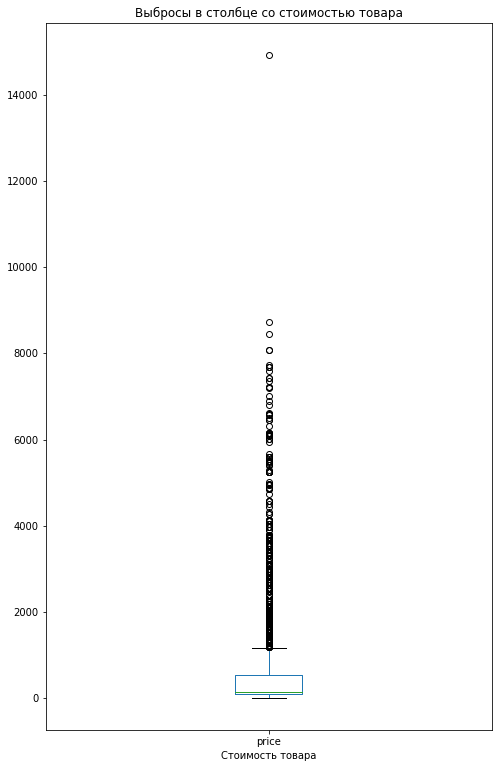

In [24]:
df_clear['price'].plot(kind='box', figsize=(8, 13))
plt.title('Выбросы в столбце со стоимостью товара')
plt.xlabel('Стоимость товара')
plt.show()

Значения в столбце `price` распределены равномерно, есть один выброс свыше 14000, на который мы указывали при изучении данных.  

In [25]:
print(df_clear[df_clear['price'] == 14917])

                    date                           customer_id  order_id  \
5992 2019-07-29 17:00:00  0d87f4ae-465a-4fac-81e6-5d629761783e     72139   

                                                                         product  \
5992  сушилка уличная leifheit 85210 linomatic v 400 40 м 175х237х237 см зеленая   

      quantity    price      y_m       y_m_d  year  month  week  day  hour  
5992         1  14917.0  2019-07  2019-07-29  2019      7    31   29    17  


14917 рублей стоит одна уличная сушилка, - оставим такой заказ, т.к. это вероятнее всего реальная цена товара, а наша задача сохранить для анализа все транзакции за исключением технических ошибок. 

In [26]:
print(f'Всего в датасете после предобработки {len(df_clear.order_id.unique())} уникальных совершенных покупок.')

Всего в датасете после предобработки 3474 уникальных совершенных покупок.


In [27]:
print(f'Всего уникальных покупателей в датасете после предобработки: {len(df_clear.customer_id.unique())}.')

Всего уникальных покупателей в датасете после предобработки: 2398.


In [28]:
print(f'{(len(df_clear) / len(df)):.2%} - доля оставшихся данных после предобработки')

73.64% - доля оставшихся данных после предобработки


In [29]:
print('Относительные потери данных после фильтрации:', 
      len(df_clear) - len(df), 
      '({:.1%})'.format((len(df_clear) - len(df))/len(df)))
print(
    'Относительные потери уникальных пользователей:', 
      df_clear['customer_id'].nunique() - df['customer_id'].nunique(), 
      '({:.1%})'.format((df['customer_id'].nunique()-df_clear['customer_id'].nunique())/df['customer_id'].nunique())
)

Относительные потери данных после фильтрации: -1970 (-26.4%)
Относительные потери уникальных пользователей: -53 (2.2%)


In [30]:
#еще раз посмотрим на нашу таблицу
df_clear.head()

,date,customer_id,order_id,product,quantity,price,y_m,y_m_d,year,month,week,day,hour
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018-10,2018-10-01,2018,10,40,1,0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12, h25",1,194.0,2018-10,2018-10-01,2018,10,40,1,0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,2018-10,2018-10-01,2018,10,40,1,0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,2018-10,2018-10-01,2018,10,40,1,0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,2018-10,2018-10-01,2018,10,40,1,0


In [31]:
#проверим типы данных и количество строк в датасете
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5504 entries, 0 to 7473
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5504 non-null   datetime64[ns]
 1   customer_id  5504 non-null   object        
 2   order_id     5504 non-null   int64         
 3   product      5504 non-null   object        
 4   quantity     5504 non-null   int64         
 5   price        5504 non-null   float64       
 6   y_m          5504 non-null   period[M]     
 7   y_m_d        5504 non-null   object        
 8   year         5504 non-null   int64         
 9   month        5504 non-null   int64         
 10  week         5504 non-null   UInt32        
 11  day          5504 non-null   int64         
 12  hour         5504 non-null   int64         
dtypes: UInt32(1), datetime64[ns](1), float64(1), int64(6), object(3), period[M](1)
memory usage: 585.9+ KB


**Предварительный вывод по результатам предобработки данных:**
1. В рамках предобработки данных не были найдены полные дубликаты, однако были найдены скрытые дубликаты в количестве 1864 штук, - мы их исключили из датафрейма.
2. В рамках первичного изучения данных было установлено, что в столбце с датой заказа некорректный тип данных - заменили его на datetime. 
3. Также добавили 7 новых столбцов в нашу таблицу: 
- `y_m` - год и месяц оформления заказа, 
- `y_m_d` - год, месяц, день оформления заказа,
- `year` - год оформления заказа, 
- `month` - месяц оформления заказа,
- `week` - неделя оформления заказа,
- `day` - день оформления заказа, 
- `hour` - час оформления заказа. 
4. Были обнаружены заказы с одним номером, оформленные в разные даты, - часть таких заказов удалили, но часть было принято решение оставить после исследования. 
5. Также были обнаружены заказы с одним номером, оформленные разными покупателями, - удалили такие заказы. 
6. Почистили датасет от аномальных значений в столбце `quantity` - удалили заказ с 1000 вантузами. 
7. По результатам предобработки имеем следующее:
- наша таблица теперь состоит из 13 столбцов и 5503 строк;
- всего уникальных покупателей в датасете после предобработки: 2397;
- относительные потери уникальных пользователей 2.2% от всех пользователей после предобработки;
- в рамках предобработки мы потеряли 26.4% данных.

## Шаг 3. Проведение исследовательского анализа. Анализ ключевых метрик.

#### 9. Период наблюдения 

Прежде, чем приступить к исследовательскому анализу, установим, за какой период мы имеем данные в датафрейме. 

In [32]:
df_clear['date'].agg({'min', 'max'})

min   2018-10-01 00:00:00
max   2020-01-31 15:00:00
Name: date, dtype: datetime64[ns]

Мы имеем информацию о заказах, совершенных в период с "01" октября 2018 года по "31" января 2020 года.

#### 10. Анализ среднего чека покупателей

В дальнейшем мы будем анализировать средний чек покупателей, в связи с этим добавим в таблицу 13 столбец - `total`, в котором будет указана сумма, рассчитанная как произведение количества товара в заказе на его цену (расчет идет построчно).

In [33]:
df_clear['total'] = df_clear['quantity'] * df_clear['price']

Ниже создаем таблицу для расчета среднего чека: сначала группируем по номеру заказа и идентификатору покупателя, считаем сумму покупок. Затем в `grouped_by_customers` считаем среднее по `total`, учитывая уникальные заказы, переименовываем столбец таблицы в `avg_check`.
Итоговая таблица `grouped_by_customers` состоит из 3 столбцов: уникальный идентификатор покупателя, количество его заказов и средний чек по всем заказам.

In [34]:
grouped_by_orders = df_clear.groupby(['customer_id', 'order_id'])\
.agg({'total':'sum'}).reset_index().rename(columns={'total':'total_price'})

grouped_by_customers = grouped_by_orders.groupby('customer_id')\
.agg({'order_id':'nunique', 'total_price':'mean'}).reset_index().rename(columns={'total_price':'avg_check'})

grouped_by_customers.columns = ['customer_id', 'order_id', 'avg_check']
grouped_by_customers

,customer_id,order_id,avg_check
0,000d6849-084e-4d9f-ac03-37174eaf60c4,1,555.0
1,001cee7f-0b29-4716-b202-0042213ab038,1,442.0
2,00299f34-5385-4d13-9aea-c80b81658e1b,1,914.0
3,002d4d3a-4a59-406b-86ec-c3314357e498,1,1649.0
4,003bbd39-0000-41ff-b7f9-2ddaec152037,1,2324.0
...,...,...,...
2393,ff601403-b094-4b86-9ac6-264d725b9277,2,869.5
2394,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,1,397.0
2395,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,1,389.0
2396,ffb80538-3fda-4351-8ea9-9d2bec58bb07,1,974.0


Строим график распределения средней суммы чеков с помощью метода `histplot()`.

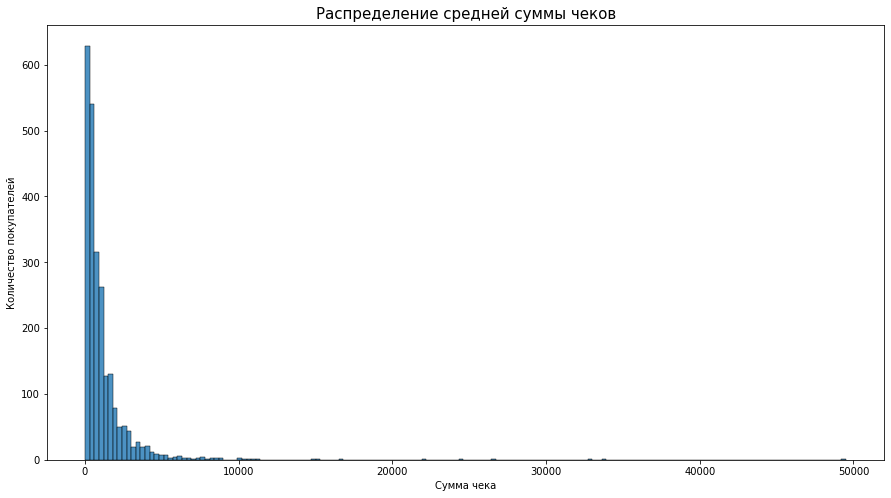

In [35]:
plt.figure(figsize = (15, 8))
sns.histplot(grouped_by_customers, x = 'avg_check', binwidth=300, alpha=0.8)
plt.xlabel("Сумма чека")
plt.ylabel("Количество покупателей")
plt.title("Распределение средней суммы чеков", fontsize=15)
plt.show()

График получился не очень информативным, так как есть пользователи, у которых средний чек может составлять свыше 20.000: вероятнее всего это пользователи, которые заказывали один раз на большую сумму. Чтобы график был более информативным, уберем все значения свыше 15.000, т.к. их немного. 

In [36]:
#делаем срез
clear_grouped_by_customers = grouped_by_customers.query('avg_check < 15000')

In [37]:
grouped_by_customers.describe()

,order_id,avg_check
count,2398.000000,2398.000000
mean,1.448707,1173.378126
std,2.706255,2112.945869
min,1.000000,15.000000
25%,1.000000,300.000000
50%,1.000000,648.000000
75%,2.000000,1348.750000
max,126.000000,49432.000000


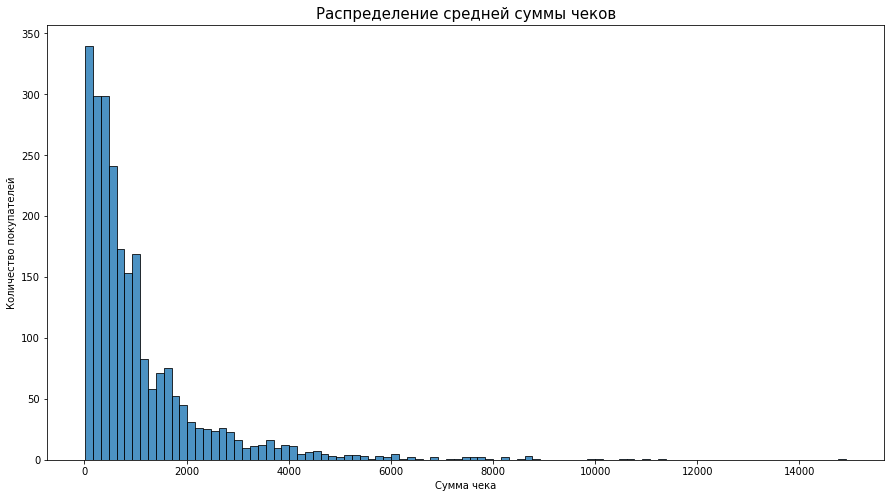

In [38]:
plt.figure(figsize = (15, 8))
sns.histplot(clear_grouped_by_customers, x = 'avg_check',alpha=0.8)
plt.xlabel("Сумма чека")
plt.ylabel("Количество покупателей")
plt.title("Распределение средней суммы чеков", fontsize=15)
plt.show()

Теперь на графике видно, что средний чек у подавляющего большинства покупателей не превышает 2.000. 

#### 11. Анализ среднего количества заказов на одного покупателя

Создадим сводную таблицу: группируем по покупателям, считаем количество заказов.

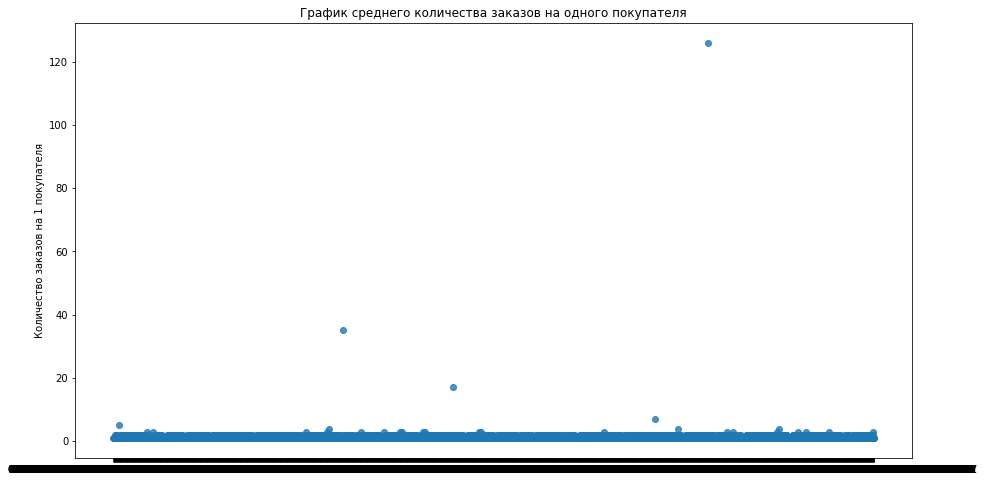

In [39]:
avg_orders = pd.pivot_table(df_clear,
                     index='customer_id',
                     values = 'order_id',
                     aggfunc = 'nunique').reset_index().rename(columns={'order_id':'order_by_cust'})

plt.figure(figsize = (15, 8))
plt.scatter(x=avg_orders['customer_id'], y=avg_orders['order_by_cust'], alpha=0.8)
plt.ylabel('Количество заказов на 1 покупателя')
plt.title('График среднего количества заказов на одного покупателя')
plt.show()

In [40]:
avg_orders.describe()

,order_by_cust
count,2398.000000
mean,1.448707
std,2.706255
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,126.000000


Мы можем увидеть, что в среднем покупатели делают около 2 заказов, однако есть покупатель, у которого 126 заказов, - посмотрим информацию по этому покупателю.

In [41]:
avg_orders[avg_orders['order_by_cust'] == 126]

,customer_id,order_by_cust
1873,c971fb21-d54c-4134-938f-16b62ee86d3b,126


In [42]:
df_clear.query('customer_id == "c971fb21-d54c-4134-938f-16b62ee86d3b"').head(40)

,date,customer_id,order_id,product,quantity,price,y_m,y_m_d,year,month,week,day,hour,total
9,2018-10-01 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,чехол для гладильной доски colombo persia beige 130х50 см из хлопка 5379,1,674.0,2018-10,2018-10-01,2018,10,40,1,9,674.0
20,2018-10-02 08:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68490,чехол для гладильной доски festival 137x60 см из хлопка 4738,1,1162.0,2018-10,2018-10-02,2018,10,40,2,8,1162.0
64,2018-10-03 08:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68511,набор прищепок большие пластиковые rozenbal пиноккио 10 шт r102312,10,86.0,2018-10,2018-10-03,2018,10,40,3,8,860.0
65,2018-10-03 10:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68514,сушилка для белья attribute прима 11 м синяя напольная adp410,1,749.0,2018-10,2018-10-03,2018,10,40,3,10,749.0
130,2018-10-08 07:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68561,тележка багажная delta тбр-20 коричневый с оранжевым грузоподъемность 25 кг сумка и 50 кг каркас россия,1,742.0,2018-10,2018-10-08,2018,10,41,8,7,742.0
131,2018-10-08 08:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68562,"готовая скатерть ажурная dia rose круглая д.152 белая, 5173, towa co., ltd",1,712.0,2018-10,2018-10-08,2018,10,41,8,8,712.0
132,2018-10-08 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68563,"сушилка для белья потолочная zalger lift basic 1520 200 см, 10 м",1,614.0,2018-10,2018-10-08,2018,10,41,8,9,614.0
139,2018-10-08 13:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68568,"таз пластмассовый 18,0 л квадратный (тп-18) ""пластхозторг"", 1404042",1,254.0,2018-10,2018-10-08,2018,10,41,8,13,254.0
160,2018-10-09 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68580,"стяжка оконная с болтом ст-55 цинк, 1108354",64,19.0,2018-10,2018-10-09,2018,10,41,9,9,1216.0
171,2018-10-10 08:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68596,сумка-тележка 3-х колесная gimi tris floral синяя,1,2699.0,2018-10,2018-10-10,2018,10,41,10,8,2699.0


Посмотрев данные по пользователю с id `c971fb21-d54c-4134-938f-16b62ee86d3b`, можем заметить следующее:
1. Пользователь активно оформлял заказы с "01" октября 2018 года по "06" марта 2019 года.
2. Каждый заказ пользователя состоит из 1 товарной позиции, но может быть несколько штук одного артикула товара. 

#### 12. Анализ количества заказов в Интернет-магазине за весь исследуемый период

Изучим, как меняется ситуация с количеством заказов в нашем Интернет-магазине. Группируем по месяцу и году оформления заказа, смотрим на количество уникальных заказов за месяц соответствующего года.

In [43]:
quantity_orders = df_clear.groupby(['y_m'])\
.agg({'order_id':'nunique'}).reset_index().rename(columns={'order_id':'unique_orders'})

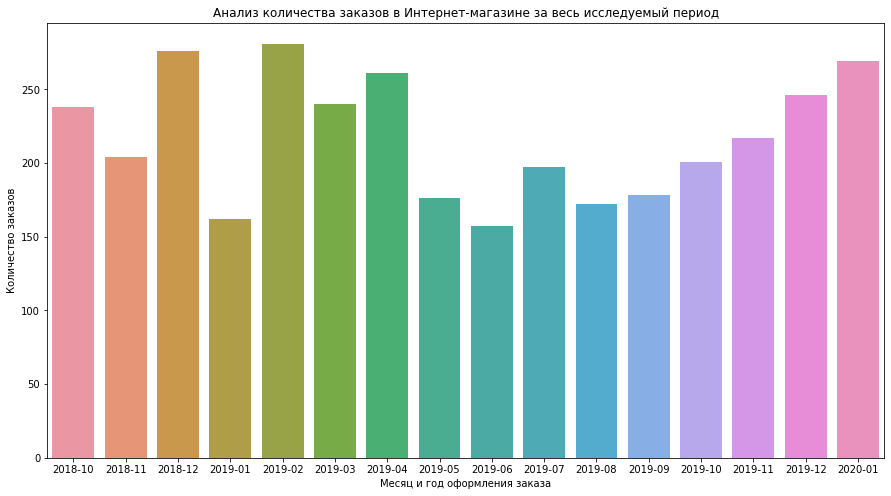

In [44]:
plt.figure(figsize=(15, 8))
sns.barplot(x='y_m', y='unique_orders', data=quantity_orders)
plt.xlabel('Месяц и год оформления заказа')
plt.ylabel('Количество заказов')
plt.title('Анализ количества заказов в Интернет-магазине за весь исследуемый период')
plt.show()

Исходя из графика мы видим, что количество оформляемых заказов снижается в летний период. Падение количества оформленных заказов в январе 2019 года можно объяснить окончанием праздников и снижением потребительского спроса, однако количество оформленных заказов в январе 2020 года выше, чем в январе 2019 и чем в декабре 2019, вероятно, проводились какие-то маркетинговые акции, что повлияло на спрос. 

#### 13. Анализ изменения общей выручки интернет-магазина по месяцам за весь исследуемый период

Теперь изучим график изменения общей выручки Интернет-магазина в разрезе по месяцам. Также группируем по месяцу-году оформления заказа и считаем сумму заказов за обозначенный период.

In [45]:
analysis_change_total = df_clear.groupby(['y_m'])\
.agg({'total':'sum'}).reset_index().rename(columns={'total':'total_revenue'})

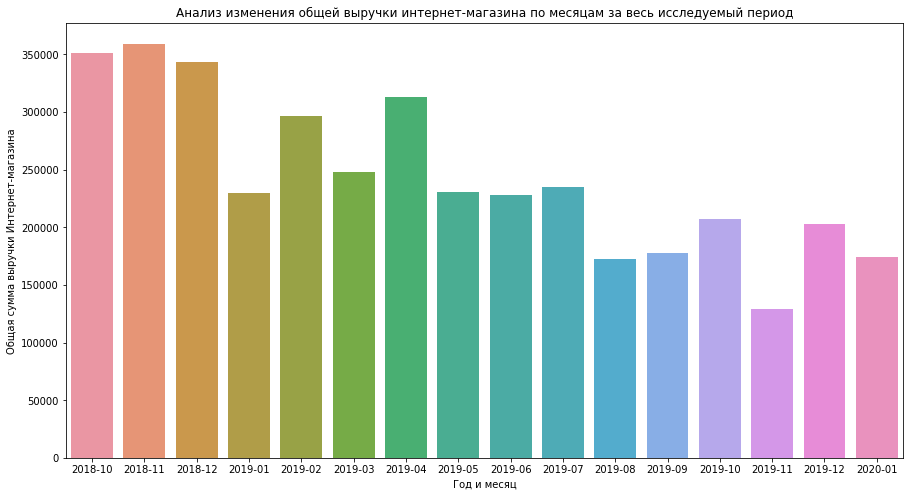

In [46]:
plt.figure(figsize=(15, 8))
sns.barplot(x='y_m', y='total_revenue', data=analysis_change_total)
plt.ylabel('Общая сумма выручки Интернет-магазина')
plt.xlabel('Год и месяц')
plt.title('Анализ изменения общей выручки интернет-магазина по месяцам за весь исследуемый период')
plt.show()

Из графика мы можем сделать следующие выводы:
- с 2018 года идет падение общей выручки Интернет-магазина, особенно это заметно, если сравнить, например, выручку января 2019 года и выручку января 2020 года;
- отмечается сезонность товаров, продаваемых в Интернет-магазине, - видим постепенное падение выручки с апреля 2019 года, обратный рост выручки начался только с сентября 2019 года (в это же время отмечается снижение количества оформляемых заказов);
- несмотря на увеличение количества продаваемых товаров в Интернет-магазине в январе 2020 года по сравнению с январем 2019 года, выручка падает.

#### 14. Оценка пользовательской активности

Проведем оценку пользовательской активности, рассчитав основные метрики Интернет-магазина.

In [47]:
dau_total = df_clear.groupby('y_m_d').agg({'customer_id': 'nunique'}).mean()

wau_total = df_clear.groupby(['year', 'week']).agg({'customer_id': 'nunique'}).mean()

mau_total = df_clear.groupby(['year', 'month']).agg({'customer_id':'nunique'}).mean()

print('Среднее количество уникальных пользователей в день: {} человек.'.format(int(dau_total)))
print('Среднее количество уникальных пользователей в неделю: {} человек.'.format(int(wau_total)))
print('Среднее количество уникальных пользователей в месяц: {} человек.'.format(int(mau_total)))

Среднее количество уникальных пользователей в день: 6 человек.
Среднее количество уникальных пользователей в неделю: 45 человек.
Среднее количество уникальных пользователей в месяц: 197 человек.


In [48]:
sticky_wau = (dau_total / wau_total) * 100
sticky_mau = (dau_total / mau_total) * 100
print('Недельная аудитория: {:0.2f}%'.format(sticky_wau[0]))
print('Месячная аудитория: {:0.2f}%'.format(sticky_mau[0]))

Недельная аудитория: 14.92%
Месячная аудитория: 3.47%


Вывод по результатам оценки пользовательской активности: мы видим, что у нас довольно низкий коэффициент "липучести", т.е. клиенты к нам практически не возвращаются, - недельный коээфициент равен 14.92%, а месячный всего 3.47%. 

Можно порекомендовать отслеживать клиентов, которые не заказывали больше месяца, и напоминать им о приложении: push-уведомления с информацией о скидках, направление купонов, предлагать оставить отзыв о ранее купленном товаре и получить скидку на весь следующий месяц и т.д.

#### 15. Категоризация товаров по группам

In [49]:
#используем готовый код для лемматизации слов русского языка
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4') 
from nltk.stem import WordNetLemmatizer
from collections import Counter

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jovyan/nltk_data...


In [50]:
#инициализируем лемматизатор
lemmatizer = WordNetLemmatizer()

Создаем функцию, которая обрежет слова из столбца `product` для дальнейшей категоризации товаров.

In [51]:
def lemmatize_text(text):
    words = text.lower().split()[:1]
    lemmas = [lemmatizer.lemmatize(word) for word in words]
    return lemmas

In [52]:
# Применяем функцию lemmatize_text ко всем значениям столбца 'Наименование'
df_clear['category'] = df_clear['product'].apply(lemmatize_text).sum()

In [53]:
# Посчитаем наиболее часто встречающиеся леммы с помощью Counter
most_common_lemmas = Counter(df_clear['category']).most_common()
most_common_lemmas

[('пеларгония', 732),
 ('рассада', 522),
 ('сушилка', 300),
 ('сумка-тележка', 265),
 ('муляж', 180),
 ('томата', 168),
 ('петуния', 153),
 ('гладильная', 137),
 ('коврик', 126),
 ('герань', 112),
 ('чехол', 107),
 ('тележка', 101),
 ('штора', 89),
 ('таз', 78),
 ('роза', 70),
 ('однолетнее', 67),
 ('искусственный', 61),
 ('калибрахоа', 52),
 ('тарелка', 51),
 ('набор', 47),
 ('вешалка', 42),
 ('бакопа', 42),
 ('корзина', 40),
 ('цветок', 40),
 ('скатерть', 39),
 ('стремянка', 28),
 ('салатник', 28),
 ('полки', 27),
 ('подвесное', 27),
 ('базилик', 25),
 ('чайник', 24),
 ('банка', 23),
 ('фуксия', 22),
 ('контейнер', 21),
 ('мята', 20),
 ('нож', 19),
 ('щетка', 19),
 ('примула', 19),
 ('флокс', 19),
 ('декабрист', 19),
 ('ёрш', 18),
 ('кружка', 18),
 ('искусственная', 17),
 ('вербена', 17),
 ('фиалка', 16),
 ('швабра', 16),
 ('цикламен', 15),
 ('бегония', 15),
 ('эвкалипт', 14),
 ('антуриум', 14),
 ('карниз', 14),
 ('новогоднее', 14),
 ('пуансеттия', 14),
 ('дыня', 14),
 ('лобелия', 14

In [54]:
plants = ['пеларгония', 'литопс', 'рассада', 'томата', 'петуния', 'герань', 'роза', 'однолетнее', 'искусственный', 
            'калибрахоа',  'подвесное', 'базилик', 'цветок', 'бакопа', 'фуксия', 'мята', 'примула', 'вербена', 'фиалка',
            'декабрист', 'флокс', 'цикламен', 'бегония','эвкалипт', 'пуансеттия', 'дыня', 'лобелия', 'антуриум'
            'тимьян',  'гвоздика','капуста','циперус', 'комнатное', 'бальзамин', 'виола', 'космея','газания', 'арбуз',
            'колокольчик', 'хризантема', 'настурция', 'огурец', 'эхеверия', 'хлорофитум', 'афеляндра', 'лаванда','алиссум',
            'калатея', 'азалия', 'мирт', 'цинния', 'дендробиум', 'покрывало', 'спатифиллум', 'кофе', 'овсянница',
            'лавр', 'вербейник', 'котовник', 'табак', 'тагетис', 'портулак', 'клубника', 'камнеломка', 'зверобой', 'многолетнее',
            'томат', 'петрушка', 'гортензия', 'радермахера', 'хризолидокарпус', 'цветущее', 'розмарин', 'мимоза', 'календула',
            'кореопсис', 'фаленопсис', 'аптения', 'алоэ', 'эхинокактус', 'незабудка', 'седум', 'укроп', 'гардения', 'астра',
            'левкой', 'патиссон', 'мединилла', 'шеффлера', 'аспарагус', 'молодило', 'гербера', 'каланхое', 'лапчатка',
            'диффенбахия', 'гипсофила', 'аквилегия', 'земляника', 'калла', 'чабер', 'ранункулус', 'ясколка', 'цинерания', 
            'нивянник', 'физостегия', 'лантана', 'клен', 'нефролепис','тюльпан', 'змееголовник', 'сельдерей', 'хамедорея', 
            'папоротник', 'платикодон', 'энотера', 'цитрофортунелла', 'хризолидокарпус',  'пиретрум', 'колеус', 'муррайя',         'аргирантерум', 'вероника', 'целозия', 'сальвия', 'фатсия',
            'монарда', 'осина', 'лен', 'сальвия', 'фатсия', 'соланум', 'бархатцы', 'кориандр', 'иссоп', 'кампанула', 'нолина', 
            'душица', 'пуансетия','крассула', 'цинерария','салат','цикламен,', 'гиностемма', 'кипарисовик','девичий']
          
            
house = ['сушилка', 'шпингалет', 'тряпка', 'стяжки', 'сумка-тележка', 'муляж', 'гладильная', 'коврик', 'чехол', 'тележка', 
       'штора', 'таз', 'полки', 'корзина', 'вешалка', 'ёрш', 'искусственная', 'щетка', 'карниз', 'швабра', 'набор',
       'сумка', 'новогоднее', 'подкладка', 'ведро', 'салфетка', 'сиденье', 'вешалка-плечики', 'шнур', 'мыло', 'декоративная',
       'окномойка', 'щетка-сметка', 'перчатки', 'комплект', 'крючок', 'ковер', 'плечики', 'весы', 'подставка', 'кофр', 'ящик',
       'корыто', 'чайный', 'кастрюля', 'лоток', 'вешалки', 'плед', 'львиный', 'подарочный', 'настенная', 'средство', 
       'этажерка', 'полотенце', 'зубная', 'веник', 'подголовник', 'коробка', 'универсальное', 'комод', 'сетка', 'махровое', 
       'совок', 'одеяло', 'тряпкодержатель', 'простыня', 'подушка', 'ковёр', 'холодная', 'вешалка-стойка', 'ароматизированное',
       'вешалка-сушилка', 'вантуз', 'ткань', 'стеллаж', 'ерш', 'полка', 'урна-пепельница', 'короб', 'вкладыши', 'наматрасник',
       'утюг', 'халат','бельевые', 'нетканые', 'пылесос', 'увлажняющая', 'автоматическая','прищепки','универсальный',
       'мешок', 'вакуумный', 'урна']
         

kitchen = ['половник', 'мерный', 'тарелка', 'салатник', 'скатерть', 'чайник', 'банка', 'контейнер', 'кружка', 'нож', 'сковорода',
         'подрукавник', 'термокружка', 'ложка', 'вилка', 'кувшин', 'овощеварка', 'разделочная', 'хлебница', 'терка', 'стакан',
         'термометр', 'жестяная', 'миска', 'термос', 'рукав', 'мусорный', 'teрмокружка', 'миксер', 'столовая', 'измельчитель', 
          'просеиватель', 'форма', 'толкушка', 'стеклянная', 'доска', 'дозатор', 'холодная', 'рыбочистка', 'чайная',
          'паста', 'ковш', 'скребок','емкость','блюдце', 'блюдо', 'сито', 'бак',  'сахарница', 'соковарка', 'пьезозажигалка',
           'соковыжималка', 'столовый', 'масленка', 'сервировочная', 'пробка', 'лопатка', 'салфетница', 'кисточка','кольца', 
           'простынь', 'ключница', 'гипоаллергенный', 'модульная', 'кухонное','орехоколка','термостакан','сотейник',
           'бидон','крышка']
           
instruments = ['стремянка', 'лестница-стремянка', 'штанга', 'стремянки', 'насадка', 'стяжка', 'покрытие', 'петля', 'бензин', 
               'крепеж', 'линейка', 'лестница', 'фал', 'штангенциркуль', 'насадка-моп', 'сверло-фреза,', 'измерительный',
              'ручка-скоба','шпагат','стремянка-табурет','отделитель']


Создаем функцию, которая на основании данных из столбца product сформирует новый столбец `category`, в который войдут следующие категории:

- `инструменты`,
- `растения`,
- `кухонные товары`,
- `товары для дома`,
- `нет данных о категории` (сюда попадают все товары, которые встречаются 1 раз в заказах и которые не распределены по категориям в виду редкости).

In [55]:
def classify_product(product_lem):
    for item in kitchen:
        if item in product_lem:
            return 'кухонные товары'
    for item in house:
        if item in product_lem:
            return 'товары для дома'
    for item in plants:
        if item in product_lem:
            return 'растения'
    for item in instruments:
        if item in product_lem:
            return 'инструменты'
    return 'нет данных о категории'

In [56]:
df_clear['category'] = df_clear['category'].apply(classify_product)

In [57]:
df_clear.head()

,date,customer_id,order_id,product,quantity,price,y_m,y_m_d,year,month,week,day,hour,total,category
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018-10,2018-10-01,2018,10,40,1,0,142.0,растения
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12, h25",1,194.0,2018-10,2018-10-01,2018,10,40,1,0,194.0,растения
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,2018-10,2018-10-01,2018,10,40,1,0,112.0,растения
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,2018-10,2018-10-01,2018,10,40,1,0,179.0,растения
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,2018-10,2018-10-01,2018,10,40,1,0,112.0,растения


In [58]:
#проверим, в скольких строчках категория не указана
len(df_clear.query('category == "нет данных о категории"'))

153

In [59]:
categories = df_clear.groupby('category')\
.agg({'order_id':'count'}).sort_values(by='order_id', ascending=False)
categories

,order_id
category,
растения,2716
товары для дома,2011
кухонные товары,508
нет данных о категории,153
инструменты,116


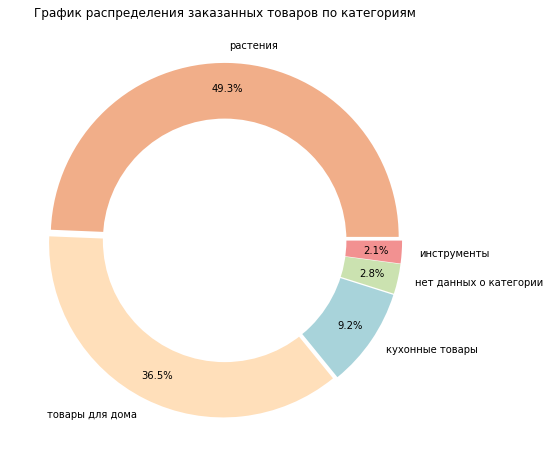

In [60]:
#настраиваем цветовую палитру
colors = ['#F1AE89', '#FFDFBa', '#A8D3DA', 
          '#CBE2B0', '#F29191']

#сепарируем блоки
explode = (0.02, 0.02, 0.02, 0.02, 0.02)

#указываем размер графика
fig, ax = plt.subplots(figsize=(15, 8))

#делим по категориям
ax.pie(categories["order_id"],
       labels=categories.index,
       colors=colors, autopct="%.1f%%",
       pctdistance=0.85, explode=explode)

center_circle = plt.Circle((0, 0), 0.70, fc="white")
fig = plt.gcf()

fig.gca().add_artist(center_circle)

plt.title("График распределения заказанных товаров по категориям")
plt.show()

Больше всего заказанных в Интернет-магазине товаров находятся в категории "растения", на втором месте "товары для дома", на третьем "кухонные товары", затем товары, которые не вошли ни в одну из категорий, и затем "инструменты". 

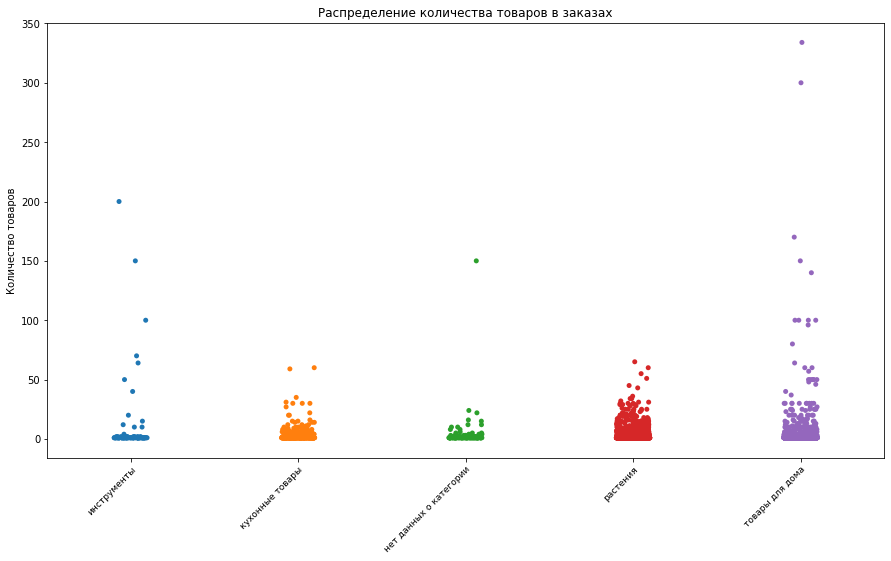

In [61]:
quantity_in_categories = df_clear.groupby(['category', 'order_id']).agg(
    {'quantity':'sum'}).reset_index()

plt.figure(figsize=(15, 8))
sns.stripplot(data=quantity_in_categories, x='category', y='quantity')
plt.xticks(rotation=45, rotation_mode='anchor', ha='right', fontsize=9)
plt.title('Распределение количества товаров в заказах')
plt.xlabel('')
plt.ylabel('Количество товаров')
plt.show()

Покупатели оформляют большие заказы в категориях "инструменты" и "товары для дома", то есть приходят в Интернет-магазин целенаправленно, зная, что хотят купить. В указанных категориях в заказе может быть очень много товаров одной категории.

#### 16. ABC-анализ сформированных категорий товаров для выявления приоритетных позиций

Проведем ABC-анализ для выявления товаров, которые приносят основной доход нашему Интернет-магазину. 

Прежде всего создаем таблицу `abc_analysis`, в которой будет 2 столбца: наименование категории товаров и выручка по каждой категории. Мы сортируем категории по убыванию - категория, которая принесла самый большой доход, будет первой в таблице.

In [62]:
abc_analysis = df_clear.groupby('category').agg(total_revenue=('total','sum')).sort_values(by='total_revenue', ascending=False).reset_index()

Для классификации категорий товаров методом ABC нам необходимы данные о всей выручке за исследуемый период и % выручки по каждой категории. 

После сортировки применяем метод cumsum(), с помощью которого посчитаем кумулятивную сумму по каждой категории и вычислим процент.

In [63]:
#добавляем новые столбцы в ранее созданную нами таблицу
abc_analysis['rev_cum_sum'] = abc_analysis['total_revenue'].cumsum()
abc_analysis['rev_all'] = abc_analysis['total_revenue'].sum()
abc_analysis['sku_rev_percent'] = abc_analysis['rev_cum_sum']/abc_analysis['rev_all']
abc_analysis.head()

,category,total_revenue,rev_cum_sum,rev_all,sku_rev_percent
0,товары для дома,2.671626e+06,2.671626e+06,3.898757e+06,0.685251
1,растения,5.507713e+05,3.222398e+06,3.898757e+06,0.826519
2,кухонные товары,4.062655e+05,3.628663e+06,3.898757e+06,0.930723
3,инструменты,1.711493e+05,3.799812e+06,3.898757e+06,0.974621
4,нет данных о категории,9.894500e+04,3.898757e+06,3.898757e+06,1.000000


Создаем функцию, которая каждой категории присвоит грейд:
- `A` - категория приносит более 80% дохода Интернет-магазина;
- `B` - еще 10% дохода Интернет-магазина (в результате A+B - это 90% дохода магазина);
- `C` - категория, приносящая менее 10% дохода Интернет-магазина. 

In [64]:
def condition_abc(x):
 if x>0 and x<=0.80:
   return "A"
 elif x>0.80 and x<=0.90:
   return "B"
 else:
   return 'C'


abc_analysis['ABC']=abc_analysis['sku_rev_percent'].apply(condition_abc)
abc_analysis

,category,total_revenue,rev_cum_sum,rev_all,sku_rev_percent,ABC
0,товары для дома,2.671626e+06,2.671626e+06,3.898757e+06,0.685251,A
1,растения,5.507713e+05,3.222398e+06,3.898757e+06,0.826519,B
2,кухонные товары,4.062655e+05,3.628663e+06,3.898757e+06,0.930723,C
3,инструменты,1.711493e+05,3.799812e+06,3.898757e+06,0.974621,C
4,нет данных о категории,9.894500e+04,3.898757e+06,3.898757e+06,1.000000,C


В результате проведенного ABC-сегментирования мы выделили лидеров продаж нашего Интернет-магазина - это категории "товары для дома" и "растения". Эти 2 категории приносят 90% дохода Интернет-магазина. 

**Вывод по результатам исследовательского анализа:**
1. Мы исследуем транзакции Интернет-магазина, совершенные в период с "01" октября 2018 года по "31" января 2020 года.
2. Средний чек у подавляющего большинства покупателей не превышает 2.000 у.е.
3. В среднем покупатели делают около 2 заказов в Интернет-магазине, соответственно, есть проблема с удержанием покупателей.
4. В нашем Интернет-магазине отмечается сезонный спад продаж: в летний период оформляется меньше заказов, чем в остальные месяцы года, выручка также падает. 
5. Также выручка падает год к году, несмотря на то, что количество оформленных заказов в январе 2020 года больше, чем в январе 2019 года. Соответственно, продавать магазин стал больше, а сумма покупок падает.
6. Самыми популярными категориями товаров в нашем Интернет-магазине являются:
- "товары для дома" - приносит больше всего дохода, 
- "растения" - приносит меньше дохода, чем "товары для дома", однако товаров этой категории продается больше всего.
7. В связи с тем, что Интернет-магазин продает больше всего товаров в категории "растения" увеличение количества оформляемых заказов в феврале-апреле можно объяснить: дачники закупают рассаду.
8. В категориях "инструменты" и "товары для дома" часто заказы с большим количеством позиций, значит, есть покупатели, которые целенаправленно приходят в наш магазин за товарами этой категории. 

## Шаг 4. Сегментация покупателей

Сегментацию покупателей планируется проводить на базе RFM-анализа. 
Каждому покупателю присвоим оценку по каждому из признаков — recency (давность покупки), frequency (частота покупок) и monetary (сумма трат покупателя). 

В итоге будет 10 сегментов покупателей: 

- Чемпионы - покупали недавно, покупают часто и тратят больше всех;
- Лояльные - делают частые покупки на среднюю сумму, хорошо реагируют на рекламу;
- Потенциальные - покупали недавно, потратили хорошую сумму, покупали не один раз; 
- Новички - в последнее время совершали покупки, сумма небольшая, частота покупок низкая;
- Многообещающие - недавно покупали, потратили мало;
- Требуют внимания - уровень давности покупки выше среднего, частота и сумма покупок также выше среднего; 
- На грани - последняя покупка, чек и частота покупок ниже среднего, потеряем клиентов, если не попытаемся вернуть;
- В зоне риска - давно не покупали, тратили выше среднего, надо вернуть;
- Нельзя потерять - делали очень дорогие покупки, часто, но давно не возвращались;
- Спящие - давно не покупали, сумма покупок низкая, частота покупок низкая. 

В рамках сегментов проводим анализ профилей потребления по 3 признакам, описанным выше. 

Дату проведения анализа установим "01" февраля 2020 года. 

In [65]:
#получаем последний день, в который был оформлен заказ
df_clear["date"].max()

#устанавливаем дату исследования (последняя покупка была сделана 2020-01-31)
today_date = dt.datetime(2020, 2, 1)

#создаем таблицу rfm
#группируем по customer_id, учитываем уникальные заказы, считаем сумму заказа, считаем, сколько прошло с последнего заказа
rfm = df_clear.groupby('customer_id', as_index=False).agg({'date': lambda date: (today_date - date.max()).days,
'order_id': lambda order_id: order_id.nunique(),
'total': lambda total: total.sum()})
rfm.head()

#создаем колонки нашей таблицы
rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']

In [66]:
#чем меньше балл recency (давность покупки), тем выше оценка пользователя, баллы ставим от 5 до 1
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
#создаем столбец с частотой покупок, тут все логичнее - чем реже покупает, тем ниже оценка, поэтому проставляем баллы от 1 до 5
rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
#чем меньше сумма трат, тем меньше оценка
rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

#присваеваем баллы
rfm["rfm_score"] = (rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str) + rfm["monetary_score"].astype(str))

In [67]:
#создаем сегментацию в соответствии с ранее обозначенными категориями 
seg_map = {
    r'[1-2][2-5][1-3]': 'на грани',
    r'[1-2][1-5][2-5]': 'в зоне риска',
    r'[1-2][3-5][4-5]': 'нельзя потерять',
    r'[1-2][1-4][1-3]': 'спящие',
    r'[3-5][1-5][3-5]': 'требуют внимания',
    r'[3-4][4-5][3-5]': 'лояльные',
    r'[3-5][1-5][1-3]': 'многообещающие',
    r'5[1-3][1-5]': 'новички',
    r'[4-5][2-5][3-5]': 'потенциальные',
    r'[4-5][2-5][4-5]': 'чемпионы'
}
rfm['segment'] = rfm['rfm_score'].replace(seg_map, regex=True)

In [68]:
#проверяем, чтобы у каждого пользователя был указан сегмент
rfm['segment'].unique()

array(['многообещающие', 'в зоне риска', 'требуют внимания', 'спящие',
       'на грани'], dtype=object)

После вывода уникальных значений столбца с сегментом можно заметить, что среди наших пользователей нет "чемпионов" и тех, кого "нельзя потерять". Все потому, что ранее мы выяснили, что в нашем Интернет-магазине плохая статистика удержания покупателей, - покупатели приходят в наш магазин, совершают покупку и часто больше не возвращаются. 

In [69]:
#выводим итоговую таблицу
rfm

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score,segment
0,000d6849-084e-4d9f-ac03-37174eaf60c4,107,1,555.0,4,1,2,412,многообещающие
1,001cee7f-0b29-4716-b202-0042213ab038,349,1,442.0,2,1,2,212,в зоне риска
2,00299f34-5385-4d13-9aea-c80b81658e1b,109,1,914.0,4,1,3,413,требуют внимания
3,002d4d3a-4a59-406b-86ec-c3314357e498,369,1,1649.0,2,1,4,214,в зоне риска
4,003bbd39-0000-41ff-b7f9-2ddaec152037,124,1,2324.0,4,1,5,415,требуют внимания
...,...,...,...,...,...,...,...,...,...
2393,ff601403-b094-4b86-9ac6-264d725b9277,12,2,1739.0,5,5,4,554,требуют внимания
2394,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,93,1,397.0,4,4,2,442,многообещающие
2395,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,413,1,389.0,1,4,2,142,на грани
2396,ffb80538-3fda-4351-8ea9-9d2bec58bb07,144,1,974.0,3,4,3,343,требуют внимания


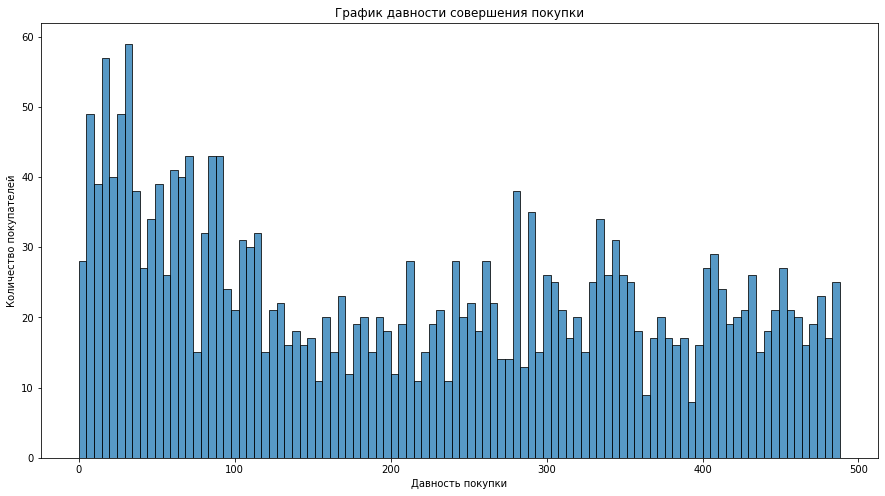

In [70]:
plt.figure(figsize=(15,8))
sns.histplot(rfm.recency, kde=False, bins=100)
plt.xlabel('Давность покупки')
plt.ylabel('Количество покупателей')
plt.title('График давности совершения покупки')
plt.show()

График показывает нам, что у нас много покупателей, которые совершили покупку и вернулись либо совсем не скоро, либо не вернулись.

In [71]:
sq1 = rfm.groupby('segment')['customer_id'].nunique().sort_values(ascending=False).reset_index()
sq1

,segment,customer_id
0,требуют внимания,891
1,многообещающие,551
2,в зоне риска,457
3,на грани,444
4,спящие,55


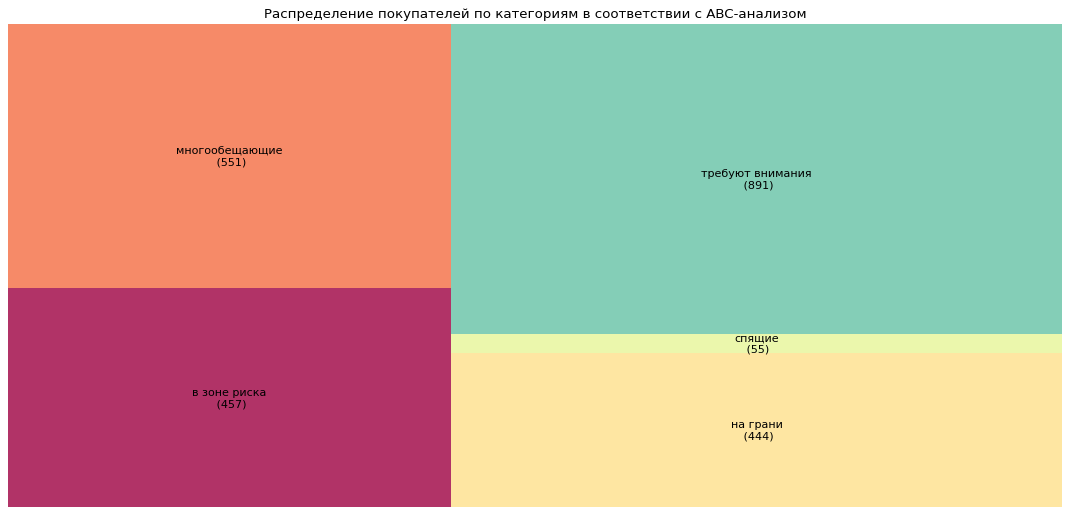

In [72]:
!!pip install squarify
import squarify
sq2 = rfm.groupby('segment').size().reset_index(name='customer_id')
labels = sq2.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = sq2['customer_id'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]


plt.figure(figsize=(17,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)


plt.title('Распределение покупателей по категориям в соответствии с ABC-анализом')
plt.axis('off')
plt.show()

**Вывод по результатам сегментирования покупателей Интернет-магазина:**
1. Большинство покупателей нашего Интернет-магазина находятся в 3 сегментах:
- "требуют внимания" - 898 покупателей, у которых уровень давности покупки выше среднего, частота и сумма покупок также выше среднего;
- "многообещающие" - 553 покупателей, которые недавно покупали товары в нашем Интернет-магазине, но потратили мало, повлияв на них, мы можем добиться их возврата в наш Интернет-магазин за повторными покупками;
- "в зоне риска" - 459 покупателей, которые давно не покупали, тратили выше среднего, - их надо вернуть.
2. И снова мы видим, что в нашем Интернет-магазине плохое удержание пользователей, - большинство не возвращается за повторными покупками.

## Шаг 5. Проверка статистических гипотез

Итого выбраны **2 гипотезы** для проверки:
1. Сумма среднего чека в сегментах покупателей "в зоне риска" и "требуют внимания" одинаковая.
- Нулевая гипотеза: Сумма среднего чека в сегментах покупателей "в зоне риска" и "требуют внимания" одинаковая.
- Альтернативная гипотеза: Сумма среднего чека в сегментах покупателей "в зоне риска" и "требуют внимания" различается.
2. Среднее дневное количество заказов в январе 2020 года не изменилось относительного того же периода 2019 года.
- Нулевая гипотеза: Среднее дневное количество заказов в январе 2020 года не изменилось относительного того же периода 2019 года.
- Альтернативная гипотеза: Среднее дневное количество заказов в январе 2020 года изменилось относительного того же периода 2019 года.

Для того, чтобы проверять в дальнейшем статистические гипотезы, объединим наши 2 таблицы: rfm и df_clear, - объединенную таблицу назовем `final_df`.

In [73]:
final_df = df_clear.merge(rfm, on='customer_id')

Мы проводим ***двухвыборочный t-тест*** с использованием функции ttest_ind() из библиотеки scipy.stats.

Прежде, чем мы проведем тест, нам нужно решить, будем ли мы предполагать, что две совокупности имеют одинаковую дисперсию или нет. 

In [74]:
final_df.head(30)

,date,customer_id,order_id,product,quantity,price,y_m,y_m_d,year,month,...,total,category,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score,segment
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018-10,2018-10-01,2018,10,...,142.0,растения,488,1,1037.0,1,3,3,133,на грани
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12, h25",1,194.0,2018-10,2018-10-01,2018,10,...,194.0,растения,488,1,1037.0,1,3,3,133,на грани
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,2018-10,2018-10-01,2018,10,...,112.0,растения,488,1,1037.0,1,3,3,133,на грани
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,2018-10,2018-10-01,2018,10,...,179.0,растения,488,1,1037.0,1,3,3,133,на грани
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,2018-10,2018-10-01,2018,10,...,112.0,растения,488,1,1037.0,1,3,3,133,на грани
5,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,шеффлера лузеана d-9 см,1,164.0,2018-10,2018-10-01,2018,10,...,164.0,растения,488,1,1037.0,1,3,3,133,на грани
6,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,юкка нитчатая d-12 см h-25-35 см,1,134.0,2018-10,2018-10-01,2018,10,...,134.0,нет данных о категории,488,1,1037.0,1,3,3,133,на грани
7,2018-10-01 08:00:00,375e0724-f033-4c76-b579-84969cf38ee2,68479,настенная сушилка для белья gimi brio super 100,1,824.0,2018-10,2018-10-01,2018,10,...,824.0,товары для дома,487,1,824.0,1,1,3,113,в зоне риска
8,2018-10-01 08:00:00,6644e5b4-9934-4863-9778-aaa125207701,68478,"таз пластмассовый 21,0 л круглый ""водолей"" с614, 1404056",1,269.0,2018-10,2018-10-01,2018,10,...,269.0,товары для дома,92,2,307.0,4,4,2,442,многообещающие
9,2019-10-31 16:00:00,6644e5b4-9934-4863-9778-aaa125207701,111409,"рассада дыни сорт казачка, горшок 9*9см",1,38.0,2019-10,2019-10-31,2019,10,...,38.0,растения,92,2,307.0,4,4,2,442,многообещающие


#### 5.1. Проверка первой гипотезы

**Нулевая гипотеза (H0):** сумма среднего чека в сегментах покупателей " в зоне риска" и "требуют внимания" одинаковая.

**Альтернативная гипотеза (Ha):** в суммах среднего чека в сегментах покупателей "в зоне риска" и "требуют внимания" есть статистически значимые различия.

In [75]:
rev_risk = final_df[final_df['segment'] == 'в зоне риска'].groupby('order_id').agg({'total':'sum'})['total']
rev_att = final_df[final_df['segment'] == 'требуют внимания'].groupby('order_id').agg({'total':'sum'})['total']

print('Дисперсия средней суммы чека сегмента "в зоне риска": {}'.format(np.var(rev_risk, ddof=1)))
print('Дисперсия средней суммы чека "требуют внимания": {}'.format(np.var(rev_att, ddof=1)))
print('Соотношение дисперсий: {}'.format((np.var(rev_risk, ddof=1))/(np.var(rev_att, ddof=1))))

Дисперсия средней суммы чека сегмента "в зоне риска": 11025651.973407444
Дисперсия средней суммы чека "требуют внимания": 4085249.160605299
Соотношение дисперсий: 2.6988933942461926


Отношение большей дисперсии выборки к меньшей дисперсии выборки меньше 4. Это означает, что мы можем предположить, что дисперсии генеральной совокупности равны.

In [76]:
alpha = 0.05
results = st.ttest_ind(rev_risk, rev_att, equal_var=True)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: между выборками есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать выборки разными')

p-значение:  3.314643051416035e-10
Отвергаем нулевую гипотезу: между выборками есть значимая разница


In [77]:
print('Сумма среднего чека сегмента "в зоне риска": {:.2f}'.format(np.mean(rev_risk)))
print('Сумма среднего чека сегмента "требуют внимания": {:.2f}'.format(np.mean(rev_att)))
print('Соотношение между средней суммой чеков двух сегментов: {:.2f}'.format(np.mean(rev_risk) / np.mean(rev_att)))

Сумма среднего чека сегмента "в зоне риска": 2121.06
Сумма среднего чека сегмента "требуют внимания": 1387.61
Соотношение между средней суммой чеков двух сегментов: 1.53


#### 5.2. Проверка второй гипотезы

**Нулевая гипотеза (H0):** Между средним чеком покупателей сегментов "многообещающие" и "на грани" в категориях "растения" и "товары для дома" нет статистически значимой разницы. 

**Альтернативная гипотеза (Ha):** Между средним чеком покупателей сегментов "многообещающие" и "на грани" в категориях "растения" и "товары для дома" есть статистически значимая разница.

In [78]:
about_to_sleep = final_df.query('segment == "на грани" and (category == "растения" or category == "товары для дома")')
promising = final_df.query('segment == "многообещающие" and (category == "растения" or category == "товары для дома")')
about_to_sleep = about_to_sleep.groupby('order_id').agg({'total':'sum'})['total']
promising = promising.groupby('order_id').agg({'total':'sum'})['total']
print('Дисперсия средней суммы чека в категориях "растения" и "товары для дома" сегмента "на грани": {}'.format(np.var(about_to_sleep, ddof=1)))
print('Дисперсия средней суммы чека в категориях "растения" и "товары для дома" сегмента "многообещающие": {}'.format(np.var(promising, ddof=1)))
print('Соотношение дисперсий: {}'.format((np.var(about_to_sleep, ddof=1))/(np.var(promising, ddof=1))))

Дисперсия средней суммы чека в категориях "растения" и "товары для дома" сегмента "на грани": 96779.58037649948
Дисперсия средней суммы чека в категориях "растения" и "товары для дома" сегмента "многообещающие": 29708.373363636914
Соотношение дисперсий: 3.2576532949783714


In [79]:
alpha = 0.05
results = st.ttest_ind(about_to_sleep, promising, equal_var=True)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: между выборками есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать выборки разными')

p-значение:  1.3408196098205702e-47
Отвергаем нулевую гипотезу: между выборками есть значимая разница


In [80]:
print('Средний чек покупателей сегмента "на грани" в категориях "растения" и "товары для дома" составляет: {:.2f}'.format(np.mean(about_to_sleep)))
print('Средний чек покупателей сегмента "многообещающие" в категориях "растения" и "товары для дома" составляет: {:.2f}'.format(np.mean(promising)))

Средний чек покупателей сегмента "на грани" в категориях "растения" и "товары для дома" составляет: 462.07
Средний чек покупателей сегмента "многообещающие" в категориях "растения" и "товары для дома" составляет: 233.48


**Вывод по результатам проверки статистических гипотез**

Мы проверили 2 гипотезы, в результате чего было установлено, что:
1) средний чек в сегменте "требуют внимания" значимо ниже среднего чека в сегменте "в зоне риска";

2) cредний чек покупателей сегмента "на грани" в категориях "растения" и "товары для дома" почти в 2 раза выше среднего чека покупателей сегмента "многообещающие" в тех же категориях товаров, разница в среднем чеке является статистически значимой.

## Шаг 6. Подготовка рекомендаций для будущей сегментации покупателей

1. Последующую сегментацию рекомендуется проводить так же - на базе RFM анализа в соответствии с критериями, указанными в Шаге 4.
2. По мере улучшения показателя удержания пользователей в Интернет-магазине рекомендуется пересмотреть пределы frequency (частота покупок) в словаре `seg_map` в Шаге 4.
3. На основании результата проверки первой гипотезы рекомендуется более подробно изучить категорию "в зоне риска", т.к. таких пользователей очень много, сумма среднего чека в данной категории выше, чем в категории "требуют внимания". Пользователи сегмента "в зоне риска" давно не возвращались в наш Интернет-магазин, однако тратили выше среднего, таким пользователям, например, можно предложить купон на скидку 10% от цены товара из категории "растения", чтобы привлечь внимание к магазину. 
4. На основании результата проверки второй гипотезы установили, что при +/- схожем профиле потребления сегментов "на грани" и "многообещающие" (сумма покупок ниже среднего) средний чек сегмента "на грани" в самых популярных категориях Интернет-магазина "растения" и "товары для дома" почти в 2 раза выше среднего чека сегмента "многообещающие" в тех же категориях товаров. Покупателям, находящимся в категории "на грани", нужно уделить повышенное внимание. 

Предлагается несколько опций: 
- направить уведомление о том, что приложение обновилось и стало лучше; 
- направить рассылку о предложениях месяца исходя из того, что пользователь уже покупал и исходя из сезона (если подготовка к лету, то направить рассылку с информацией о саженцах/товарах для сада, а если осень-зима, то товары для дома и быта);
- прислать push-уведомление, в котором будет указано, что при покупке от X суммы, выдается промокод на следующую покупку на 15%.
5. Пользователям из сегмента "многообещающие", которые потратили мало, но недавно что-то покупали в нашем Интернет-магазине можно отправить push-уведомление или e-mail о том, что скоро стартует распродажа и показать в первую очередь подборку товаров с будущей скидкой из тех категорий, которыми интересовались пользователи.
6. В сегменте "требуют внимания" необходимо постараться увеличить средний чек, так как пользователи и так к нам возвращаются. Таким пользователям можно предлагать скидку при покупке одновременно несколько единиц одного артикула товара, либо при заказе пользователем товара из какой-то категории предлагать купить что-то похожее, настроив автоматическую выдачу результата.

## Вывод по результатам анализа транзацкий Интернет-магазина

В рамках проведенного анализа транзакций Интернет-магазина товаров для дома и быта "Пока все ещё тут", совершенных пользователями в период с "01" октября 2018 года по "31" января 2020 года, установлено:
1. В "сыром" датафрейме `ecom_dataset_upd.csv` содержались пропуски, скрытые дубликаты, аномалии, которые мы обработали и удалили. 
2. В очищенный датасет `df_clear` добавили новые столбцы, а также заменили тип данных в столбце с датой оформления заказа. 
3. По результатам предобработки мы потеряли 26,4% данных и всего 2.2% уникальных пользователей.
4. Средний чек в Интернет-магазине не превышает 2.000 у.е.
5. В среднем пользователи оформляют по 2 заказа, удержание пользователей очень низкое.
6. Проведя оценку пользовательской активности увидели, что у нас довольно низкий коэффициент "липучести", т.е. клиенты к нам практически не возвращаются, - недельный коээфициент равен 14.92%, а месячный всего 3.47%. 
7. Выручка Интернет-магазина постепенно падает несмотря на то, что количество оформляемых заказов растет.
8. Самыми популярными категориями товаров являются товары для дома и растения, - они составляют 90% всей выручки.
9. В рамках сегментации было выявлено, что больше всего пользователей в сегментах "в зоне риска", "многообещающие" и "требуют внимания". Для указанных сегментов были выдвинуты предложения для формирования персонализированного подхода. 
10. В первую очередь Интернет-магазину стоит поработать над удержанием покупателей. 
11. Осущестив проверку гипотез, выявили, что:
- cредний чек покупателей сегмента "на грани" в категориях "растения" и "товары для дома" почти в 2 раза выше среднего чека покупателей сегмента "многообещающие" в тех же категориях товаров, разница в среднем чеке является статистически значимой;
- между суммами среднего чека в сегментах "в зоне риска" и "требуют внимания" есть статистически значимая разница (сумма среднего чека в сегменте "в зоне риска" больше).